In [3]:
pip install so4gp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 87.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ypstruct: filename=ypstruct-0.0.2-py3-none-any.whl size=2953 sha256=7ffb0fd3fa6226656d18754e55692875a39483ae0e1d3156c7ba51fccb361384
  Stored in directory: /root/.cache/pip/wheels/06/01/e9/d86f23cca6d6caa8e0e9916202c43561cab19cffc20be70ac1
Successfully built ypstruct
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.26.0 requires panda

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import so4gp as sgp

In [ ]:
with open("HCV-Egy-Data.csv", "r", encoding="utf8") as file:
  print(file.read())

In [6]:
data = pd.read_csv('HCV-Egy-Data.csv', sep=",")

# infos sur les données
print('tableau des données')
print(data)
print('----------------------------------------------------------------------')
print("Informations sur le tableau")
data.info()
print("Premières lignes du tableau")
print(data.head(10))
print('----------')

print("Statistiques de toutes les variables")
print(data.describe())
print("Taille du tableau : ", data.shape)
nb_val, nb_col = data.shape
print("Statistiques de chaque variable")
print('----------')
for k in range(nb_col):
    print(data[data.columns[k]].describe())
    print('----------')

tableau des données
      Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       56       1   35      2               1          1          1   
1       46       1   29      1               2          2          1   
2       57       1   33      2               2          2          2   
3       49       2   33      1               2          1          2   
4       59       1   32      1               1          2          1   
...    ...     ...  ...    ...             ...        ...        ...   
1380    44       1   29      1               2          2          2   
1381    55       1   34      1               2          2          1   
1382    42       1   26      2               2          1          1   
1383    52       1   29      2               1          1          2   
1384    55       2   26      1               2          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    2 

In [9]:
# on conserve uniquement les données numériques pour effectuer l'étude des corrélations


# suppression des colonne 2, 4, 5, 6, 7, 8, 9, 10 et de la dernière colonne (variable catégorielle)
data_COR = data.drop([data.columns[1], data.columns[3], data.columns[4], data.columns[5], data.columns[6], data.columns[7], data.columns[8], data.columns[9]], axis=1)

                                                         # stockage des noms des variables numériques restantes utilisées pour les corrélations
features = data_COR.columns

# Examen des donnees
#----------------------

print("Taille du tableau : ", data_COR.shape)
n,p = data_COR.shape
print('----------')

#print("Statistiques des variables utilisées pour les corrélations")
print(data_COR.describe())

Taille du tableau :  (1385, 21)
----------
              Age           BMI           WBC           RBC          HGB  \
count  1385.000000  1385.000000   1385.000000  1.385000e+03  1385.000000   
mean     46.319134    28.608664   7533.386282  4.422130e+06    12.587726   
std       8.781506     4.076215   2668.220333  3.463577e+05     1.713511   
min      32.000000    22.000000   2991.000000  3.816422e+06    10.000000   
25%      39.000000    25.000000   5219.000000  4.121374e+06    11.000000   
50%      46.000000    29.000000   7498.000000  4.438465e+06    13.000000   
75%      54.000000    32.000000   9902.000000  4.721279e+06    14.000000   
max      61.000000    35.000000  12101.000000  5.018451e+06    15.000000   

               Plat        AST 1        ALT 1         ALT4       ALT 12  ...  \
count    1385.00000  1385.000000  1385.000000  1385.000000  1385.000000  ...   
mean   158348.06065    82.774729    83.916245    83.405776    83.510469  ...   
std     38794.78555    25.993242

Corrélations entre les variables
                                   Age        BMI       WBC       RBC  \
Age                            1.000000 -0.025353  0.014310 -0.002162   
BMI                           -0.025353  1.000000  0.036721 -0.004922   
WBC                            0.014310  0.036721  1.000000  0.006928   
RBC                           -0.002162 -0.004922  0.006928  1.000000   
HGB                           -0.012810  0.057987  0.008786  0.042320   
Plat                          -0.002225 -0.003093 -0.013097  0.032431   
AST 1                         -0.016633  0.001806 -0.006985  0.016259   
ALT 1                          0.005723  0.034037 -0.038014  0.011785   
ALT4                           0.030260  0.001416 -0.012926 -0.027478   
ALT 12                         0.019046 -0.059659 -0.002510  0.017021   
ALT 24                         0.002712  0.007909 -0.012506  0.015090   
ALT 36                        -0.008721 -0.029995 -0.042220  0.050956   
ALT 48            

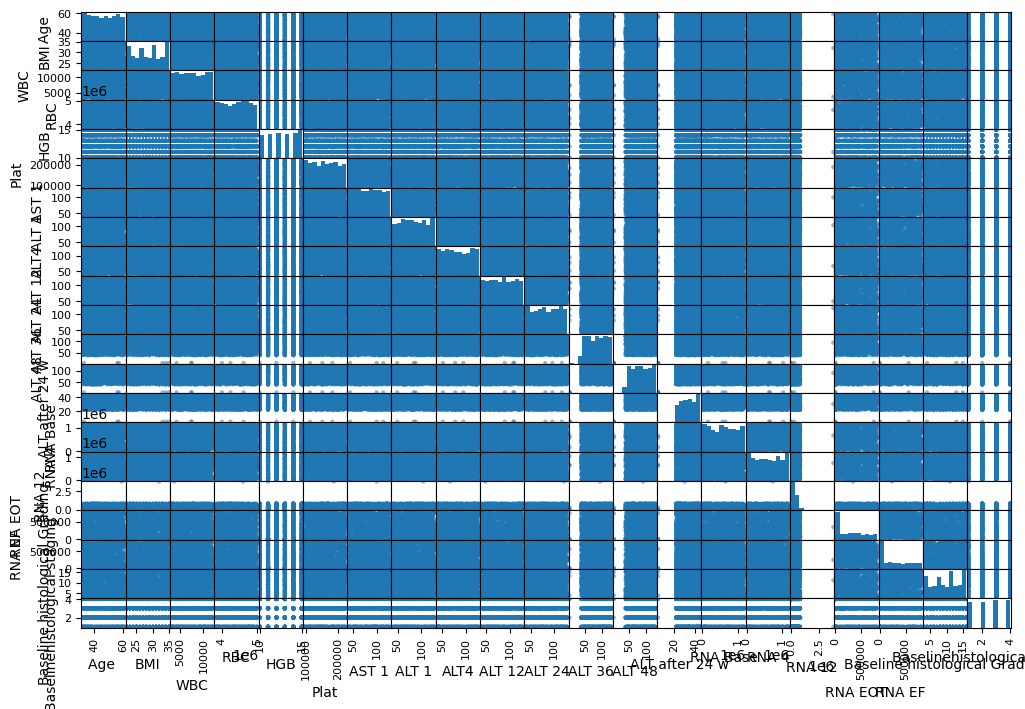

In [10]:
# calcul des corrélations entre chaque couple de variables
print("Corrélations entre les variables")
corr_matrix = data_COR.corr()
print(corr_matrix)
print('----------')

# # affichage de chaque colonne de la matrice de corrélation
print("Corrélations de chaque variable avec les autres en ordre décroissant")
for k in range(p):
    print(corr_matrix[data_COR.columns[k]].sort_values(ascending=False))
    print('----------')

# visualisation des corrélations pour chaque couple de variables
pd.plotting.scatter_matrix(data_COR,figsize=(12,8))
plt.show()

In [19]:
# graduels fréquents avec GRAANK
print("Motifs graduels fréquents avec GRAANK")
mine_obj = sgp.GRAANK(data_COR, min_sup=0.5, eq=False)
gp_json = mine_obj.discover()
print(gp_json)

Motifs graduels fréquents avec GRAANK
{"Algorithm": "GRAANK", "Patterns": [[["WBC+", "RBC+"], 0.502], [["WBC+", "Plat-"], 0.504], [["WBC+", "ALT 1-"], 0.507], [["WBC+", "ALT 36-"], 0.509], [["WBC+", "RNA Base+"], 0.505], [["WBC+", "RNA 4+"], 0.507], [["WBC-", "RBC-"], 0.502], [["Plat+", "WBC-"], 0.504], [["WBC-", "ALT 1+"], 0.507], [["ALT 36+", "WBC-"], 0.509], [["WBC-", "RNA Base-"], 0.505], [["RNA 4-", "WBC-"], 0.507], [["Plat+", "RBC+"], 0.512], [["RBC+", "ALT4-"], 0.504], [["RBC+", "ALT 36+"], 0.511], [["ALT 48-", "RBC+"], 0.513], [["RNA Base+", "RBC+"], 0.502], [["RBC+", "RNA 4+"], 0.506], [["Plat-", "RBC-"], 0.512], [["ALT4+", "RBC-"], 0.504], [["ALT 36-", "RBC-"], 0.511], [["ALT 48+", "RBC-"], 0.513], [["RNA Base-", "RBC-"], 0.502], [["RNA 4-", "RBC-"], 0.506], [["Plat+", "ALT 1+"], 0.51], [["Plat+", "ALT4-"], 0.503], [["Plat+", "ALT 12-"], 0.509], [["Plat+", "RNA Base-"], 0.513], [["Plat+", "RNA 4-"], 0.513], [["ALT 1-", "Plat-"], 0.51], [["ALT4+", "Plat-"], 0.503], [["Plat-", 

In [18]:
# graduels Approximatifs avec GRAANK par  colonies de fourmis
print("Motifs graduels Approximatifs avec GRAANK")
mine_obj_ant = sgp.AntGRAANK(data_COR)
gp_json = mine_obj_ant.discover()
print(gp_json)

Motifs graduels Approximatifs avec GRAANK
{"Algorithm": "ACO-GRAANK", "Best Patterns": [[["ALT 1-", "RNA Base-"], 0.506], [["Plat-", "RNA 4+"], 0.513]], "Invalid Count": 0, "Iterations": 3}
